In [2]:
%reset
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import glob
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/MO_pipeline/')
import scendict as sc
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/WORK_SCRIPTS')
import breakdown as bp
import numpy as np

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [16]:
t_yearlist = bp.make_yearlist(2028,2058,'ptrc','TOM12_TJ_1AS7', '/gpfs/afm/greenocean/software/runs')
tds_ptrc = xr.open_mfdataset(t_yearlist, chunks={'time_counter': 120})
t_yearlist = bp.make_yearlist(2028,2058,'diad','TOM12_TJ_1AS7', '/gpfs/afm/greenocean/software/runs')
tds_diad = xr.open_mfdataset(t_yearlist, chunks={'time_counter': 120})


In [23]:
ptrc_vars = ['Alkalini','O2','DIC','PIIC', 'NO3','Si', 'PO4','Fer','DOC','CaCO3','ARA','POC','GOC','BAC','PRO',
'PTE','MES','GEL','MAC','DIA','MIX','COC','PIC','PHA','FIX','C11','B14B','C14B','D14B']


diad_vars = ['DOCTRP','EXP', 'GRAMIC', 'GRAMES', 'GRAMAC', 'PPTDOC', 'PPT', 'TChl', 'Detrit', \
             'Carniv', 'Herbiv', 'GRAMICPHY', 'GRAMESPHY', 'GRAMACPHY', 'nitrfix', 'denitr', \
             'DELO2', 'vsink', 'sinksil', 'discarb', 'ExpCO3', 'ExpARA', 'GRAGEL', 'GRAPTE',\
             'proara', 'prococ', 'D14PRO', 'D14RES', 'fdecay', 'bdecay', 'ddecay', 'qtrC14b',\
             'qtrB14b', 'qtrD14b', 'qintC14b', 'Cflx', 'PICflx', 'Oflx', 'dpCO2', 'pCO2',\
             'PPINT']

In [29]:
baseDir = '/gpfs/afm/greenocean/software/runs/'
tr = 'TOM12_TJ_1AS7'

def get_sanity_1var(tr, baseDir, vartyp, tvar, \
               sdir = '/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/'):
    
    fact = 0.5
    fig, axs = plt.subplots(1,1, figsize=(10*fact, 6*fact), facecolor='w', edgecolor='k')
    tmin, tmax = bp.max_min_yrs(tr, baseDir)
    print(f'making sanity check for run {tr}: {tmin}-{tmax}, var {tvar}')
    
    t_yearlist = bp.make_yearlist(tmin,tmax,vartyp,tr, baseDir)
    tds = xr.open_mfdataset(t_yearlist, chunks={'time_counter': 120})
    

    
    td = tds.indexes['time_counter'].to_datetimeindex()

    print(tvar)
    yrs = tds[tvar].shape[0]/12

    gocmean = np.zeros(int(yrs)*12)
    gocmax = np.zeros(int(yrs)*12)
    ind = 0
    for i in range(0,int(yrs)):
        if i%30 == 0:
            print(i)
        goc = tds[tvar][ind:ind+12,:,:,:].values
        goc[goc == 0] = np.nan
        w = np.nanmean(np.nanmean(np.nanmean(goc, axis = 3), axis =2), axis =1)
        gocmean[ind:ind+12] = (w)
        w = np.nanmax(np.nanmax(np.nanmax(goc, axis = 3), axis =2), axis =1)
        gocmax[ind:ind+12] = (w)
        ind = ind+12

    axs.plot(td,gocmean, label = 'mean')
    axs.plot(td,gocmax, label = 'max')
    axs.set_yscale('log')
    axs.set_title(tvar)
    
    fig.suptitle(tr)
    plt.tight_layout()
    plt.show()
    #fig.savefig(f'{sdir}/SANITYCHECK_{tr}_{tmin}-{tmax}.png')



making sanity check for run TOM12_TJ_1AS7: 2028-2059, var Alkalini
Alkalini
0
30


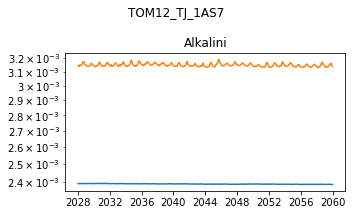

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var O2
O2
0
30


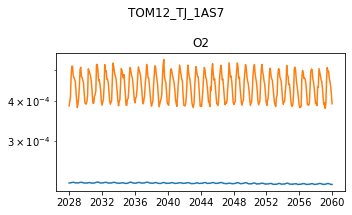

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var DIC
DIC
0
30


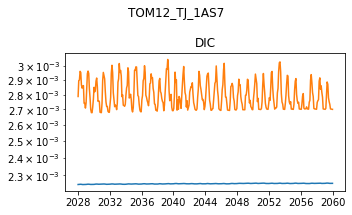

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var PIIC
PIIC
0
30


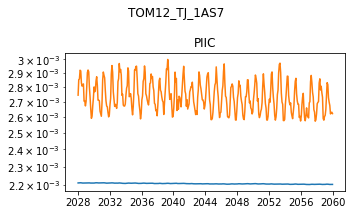

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var NO3
NO3
0
30


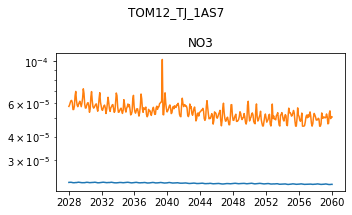

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var Si
Si
0
30


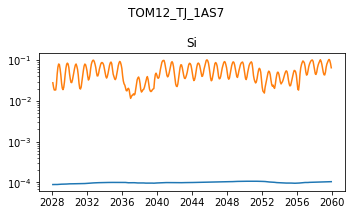

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var PO4
PO4
0
30


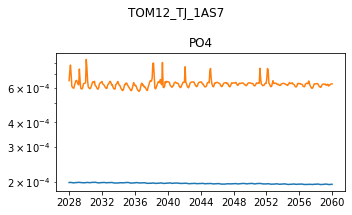

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var Fer
Fer
0
30


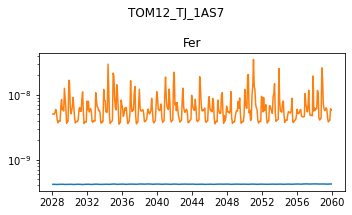

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var DOC
DOC
0
30


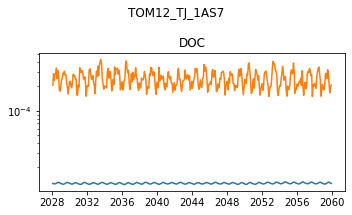

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var CaCO3
CaCO3
0
30


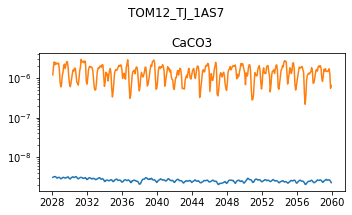

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var ARA
ARA
0
30


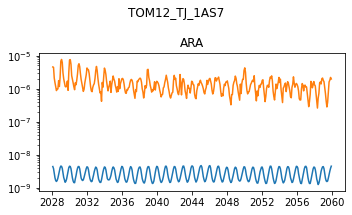

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var POC
POC
0
30


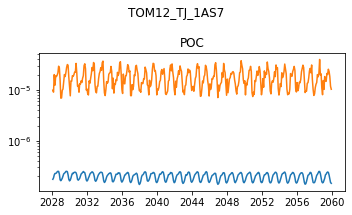

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var GOC
GOC
0
30


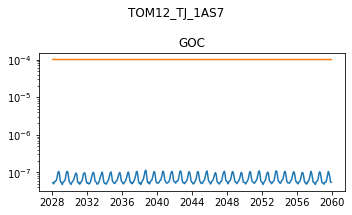

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var BAC
BAC
0
30


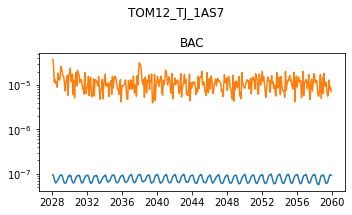

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var PRO
PRO
0
30


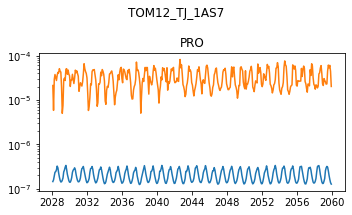

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var PTE
PTE
0
30


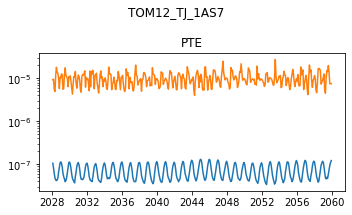

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var MES
MES
0
30


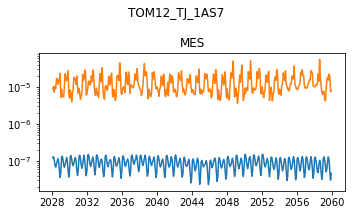

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var GEL
GEL
0
30


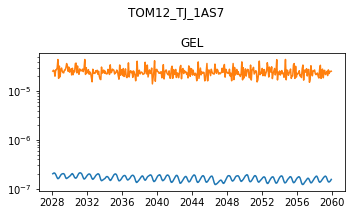

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var MAC
MAC
0
30


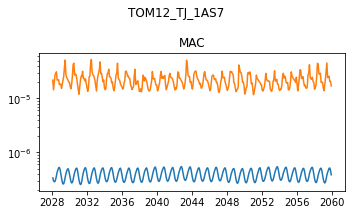

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var DIA
DIA
0
30


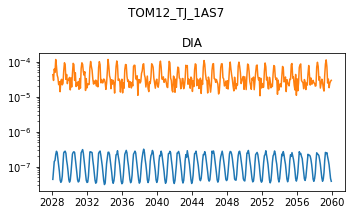

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var MIX
MIX
0
30


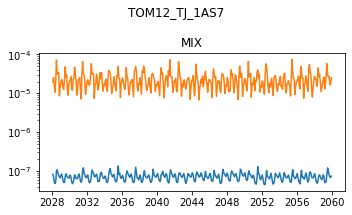

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var COC
COC
0
30


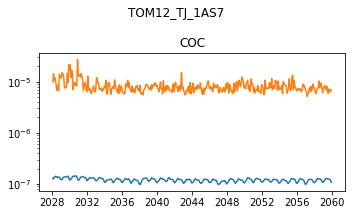

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var PIC
PIC
0
30


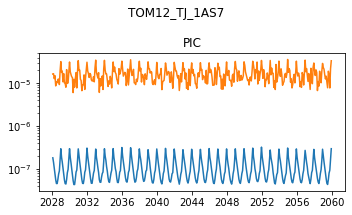

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var PHA
PHA
0
30


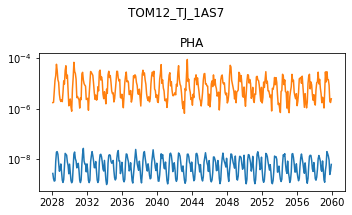

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var FIX
FIX
0
30


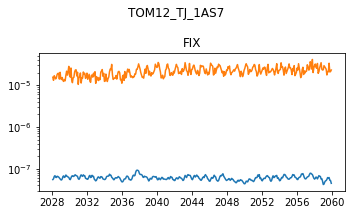

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var C11
C11
0
30


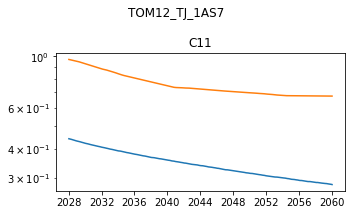

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var B14B
B14B
0
30


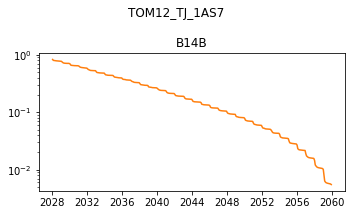

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var C14B
C14B
0
30


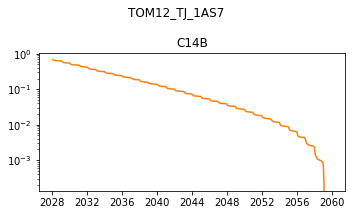

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var D14B
D14B
0
30


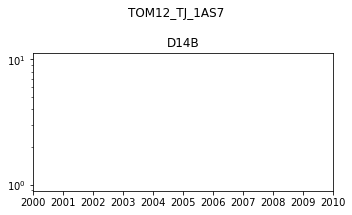

In [30]:
for i in range(0, len(ptrc_vars)):
    tvar = ptrc_vars[i]
    get_sanity_1var(tr, baseDir, 'ptrc', tvar)

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var DOCTRP
DOCTRP
0
30


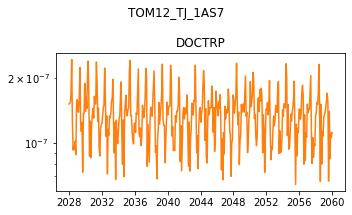

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var EXP
EXP
0
30


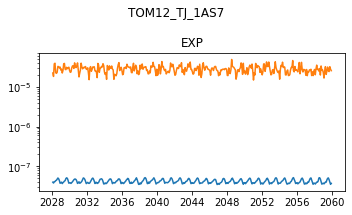

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var GRAMIC
GRAMIC
0
30


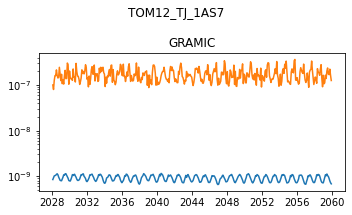

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var GRAMES
GRAMES
0
30


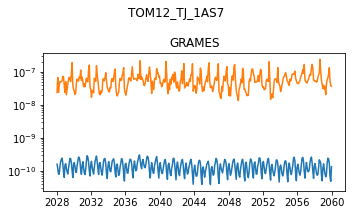

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var GRAMAC
GRAMAC
0
30


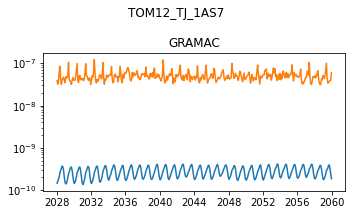

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var PPTDOC
PPTDOC
0
30


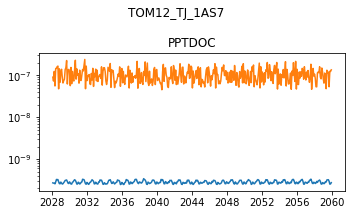

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var PPT
PPT
0
30


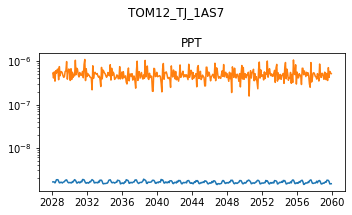

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var TChl
TChl
0
30


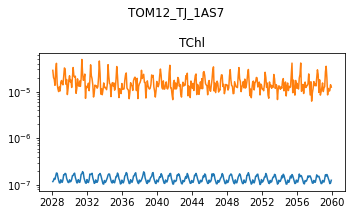

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var Detrit
Detrit
0
30


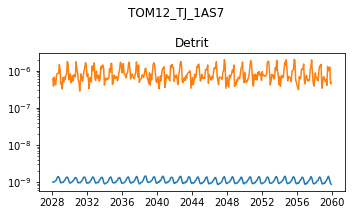

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var Carniv
Carniv
0
30


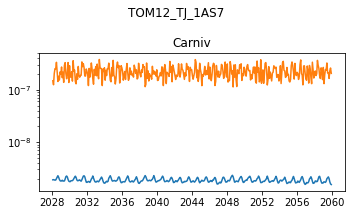

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var Herbiv
Herbiv
0
30


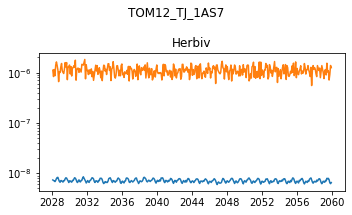

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var GRAMICPHY
GRAMICPHY
0
30


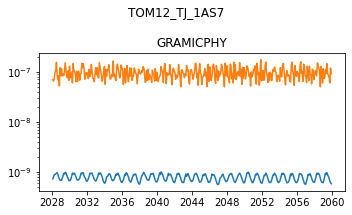

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var GRAMESPHY
GRAMESPHY
0
30


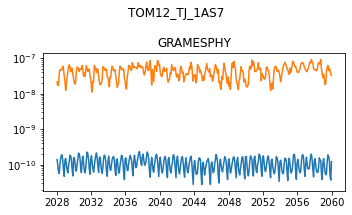

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var GRAMACPHY
GRAMACPHY
0
30


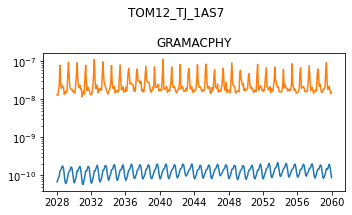

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var nitrfix
nitrfix
0
30


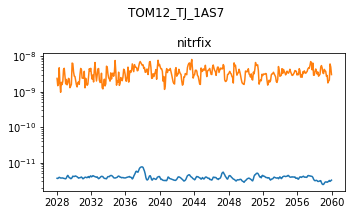

making sanity check for run TOM12_TJ_1AS7: 2028-2059, var denitr
denitr
0


In [ ]:
for i in range(0, len(diad_vars)):
    tvar = diad_vars[i]
    get_sanity_1var(tr, baseDir, 'diad', tvar)

making sanity for run TOM12_TJ_1AS7: 2028-2050
GOC
0
POC
0
EXP
0
PPT
0
TChl
0


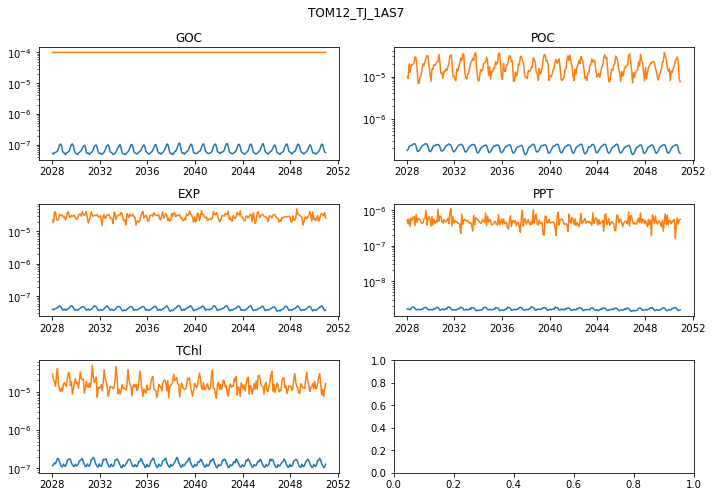

In [3]:
baseDir = '/gpfs/afm/greenocean/software/runs/'
tr = 'TOM12_TJ_1AS7'

def get_sanity(tr, baseDir,\
               sdir = '/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/'):
    
    fact = 0.5
    fig, axs = plt.subplots(3,2, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    tmin, tmax = bp.max_min_yrs(tr, baseDir)
    print(f'making sanity for run {tr}: {tmin}-{tmax}')
    
    t_yearlist = bp.make_yearlist(tmin,tmax,'ptrc',tr, baseDir)
    tds_ptrc = xr.open_mfdataset(t_yearlist, chunks={'time_counter': 120})
    t_yearlist = bp.make_yearlist(tmin,tmax,'diad',tr, baseDir)
    tds_diad = xr.open_mfdataset(t_yearlist, chunks={'time_counter': 120})
    
    t_dsets = [tds_ptrc, tds_ptrc, tds_diad, tds_diad, tds_diad]
    t_vars = ['GOC', 'POC', 'EXP', 'PPT', 'TChl']
    
    td = tds_ptrc.indexes['time_counter'].to_datetimeindex()
    
    for x in range(0,5):
        tds = t_dsets[x]; tvar = t_vars[x]
        print(tvar)
        yrs = tds[tvar].shape[0]/12

        gocmean = np.zeros(int(yrs)*12)
        gocmax = np.zeros(int(yrs)*12)
        ind = 0
        for i in range(0,int(yrs)):
            if i%30 == 0:
                print(i)
            goc = tds[tvar][ind:ind+12,:,:,:].values
            goc[goc == 0] = np.nan
            w = np.nanmean(np.nanmean(np.nanmean(goc, axis = 3), axis =2), axis =1)
            gocmean[ind:ind+12] = (w)
            w = np.nanmax(np.nanmax(np.nanmax(goc, axis = 3), axis =2), axis =1)
            gocmax[ind:ind+12] = (w)
            ind = ind+12
            
        axs[x].plot(td,gocmean, label = 'mean')
        axs[x].plot(td,gocmax, label = 'max')
        axs[x].set_yscale('log')
        axs[x].set_title(tvar)
    fig.suptitle(tr)
    plt.tight_layout()
    fig.savefig(f'{sdir}/SANITYCHECK_{tr}_{tmin}-{tmax}.png')

get_sanity(tr, baseDir)

making sanity for run TOM12_DW_GA01: 1948-2021
GOC
0
30
60
POC
0
30
60
EXP
0
30
60
PPT
0
30
60
TChl
0
30
60


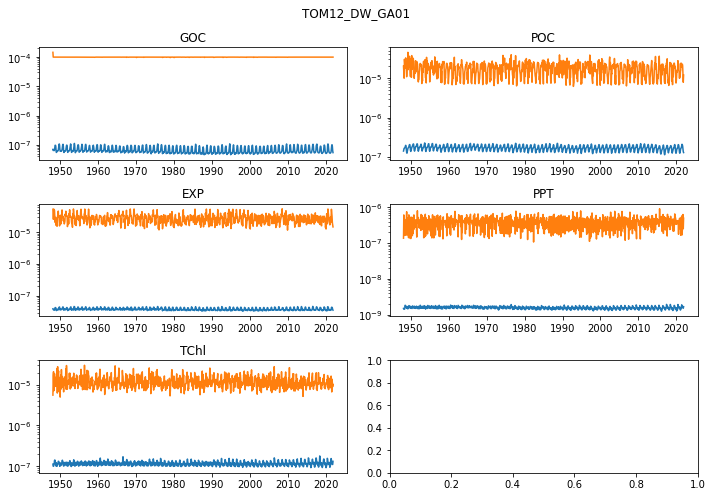

In [4]:
baseDir = '/gpfs/afm/greenocean/software/runs/'
tr = 'TOM12_DW_GA01'
get_sanity(tr, baseDir)